## **Step 1. Imports**

*   Import packages
*   Load dataset


### **Import packages**

In [2]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### **Load dataset**

In [3]:
df = pd.read_csv("tiktok_dataset.csv")
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


## **Step 2. Data Exploration (Initial EDA and data cleaning)**

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers) 



### **Gather basic information about the data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


### **Gather descriptive statistics about the data**

In [5]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [6]:
df.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

### **Check missing values**

In [7]:
df.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [8]:
#percent of data missing values
(df.isnull().sum()*100)/df.shape[0]

#                           0.000000
claim_status                1.537509
video_id                    0.000000
video_duration_sec          0.000000
video_transcription_text    1.537509
verified_status             0.000000
author_ban_status           0.000000
video_view_count            1.537509
video_like_count            1.537509
video_share_count           1.537509
video_download_count        1.537509
video_comment_count         1.537509
dtype: float64

In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

### **Check duplicates**

In [11]:
print(df.duplicated().sum())

0


In [12]:
#percent of data duplicated
print((df.duplicated().sum()*100)/df.shape[0])

0.0


## **Check outliers**

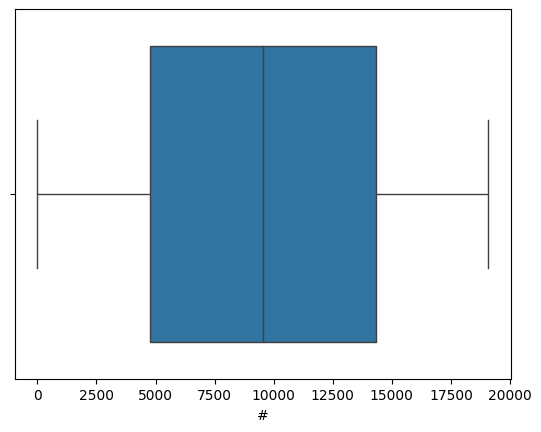

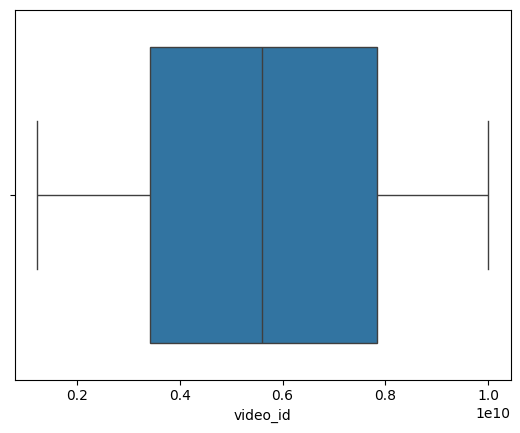

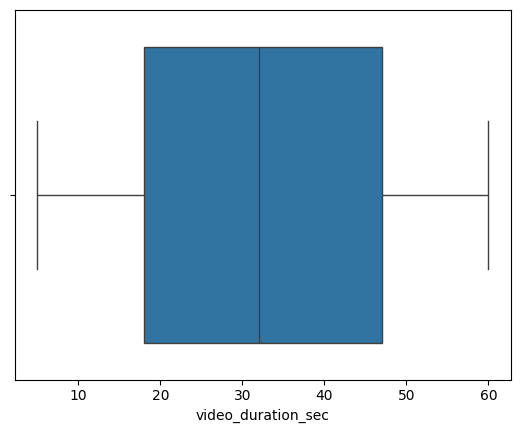

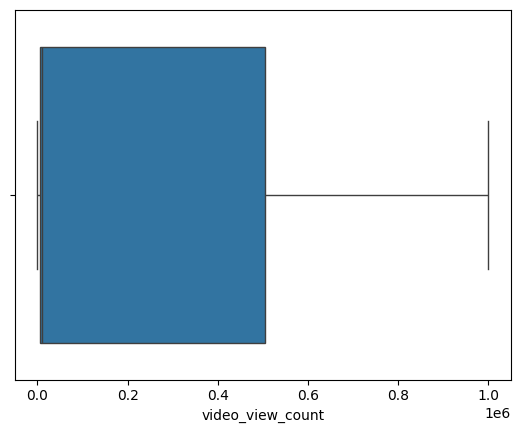

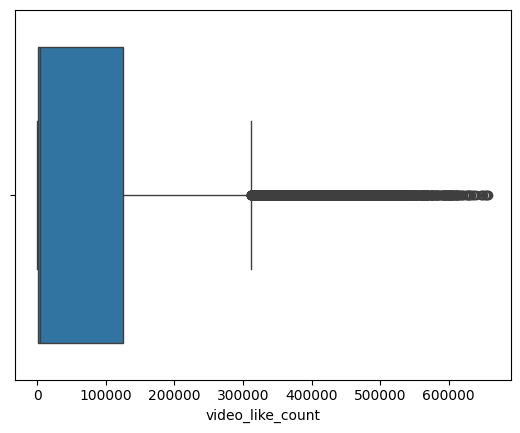

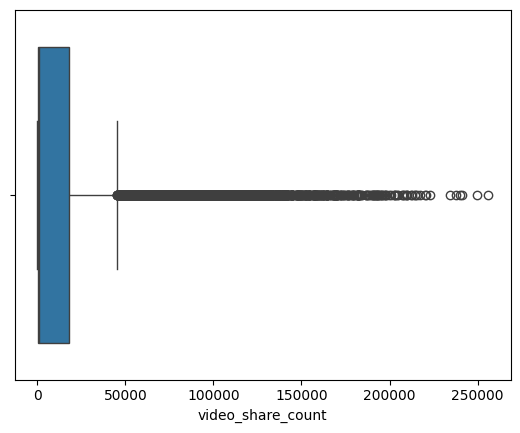

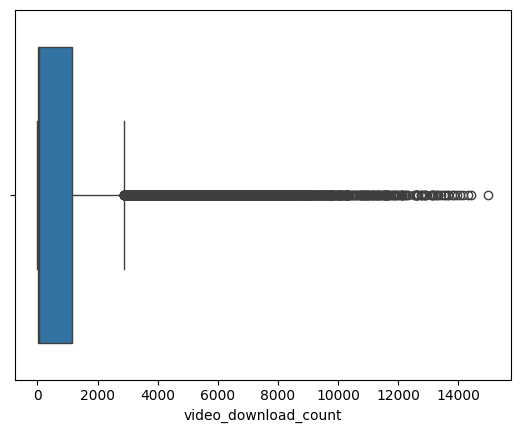

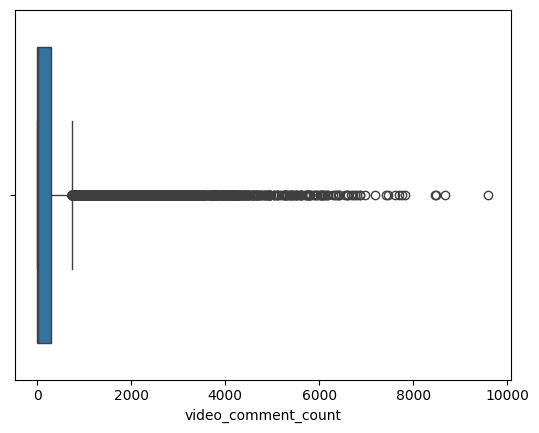

In [13]:
#box plot to identify outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [14]:
#The boxplot above shows that there are outliers in video like count,video share count,video download count,video comment count.
# Determine the number of rows containing outliers 
columns_to_check = [
    'video_like_count', 
    'video_share_count', 
    'video_download_count', 
    'video_comment_count'
]

# Loop through each column and determine the number of rows containing outliers
for column in columns_to_check:
    # Compute the 25th percentile value
    percentile25 = df[column].quantile(0.25)
    
    # Compute the 75th percentile value
    percentile75 = df[column].quantile(0.75)
    
    # Compute the interquartile range
    iqr = percentile75 - percentile25
    
    # Define the upper limit and lower limit for non-outlier values
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print(f"\nColumn: {column}")
    print("Lower limit:", lower_limit)
    print("Upper limit:", upper_limit)
    
    # Identify subset of data containing outliers
    outliers = df[(df[column] > upper_limit) | (df[column] < lower_limit)]
    
    # Count how many rows in the data contain outliers
    print("Number of rows in the data containing outliers:", len(outliers))

print("-----------------------------------------------------------------------------------------------")



Column: video_like_count
Lower limit: -185503.125
Upper limit: 311333.875
Number of rows in the data containing outliers: 1726

Column: video_share_count
Lower limit: -27045.5
Upper limit: 45382.5
Number of rows in the data containing outliers: 2508

Column: video_download_count
Lower limit: -1716.875
Upper limit: 2880.125
Number of rows in the data containing outliers: 2450

Column: video_comment_count
Lower limit: -435.5
Upper limit: 728.5
Number of rows in the data containing outliers: 2789
-----------------------------------------------------------------------------------------------


<Axes: xlabel='video_like_count', ylabel='Count'>

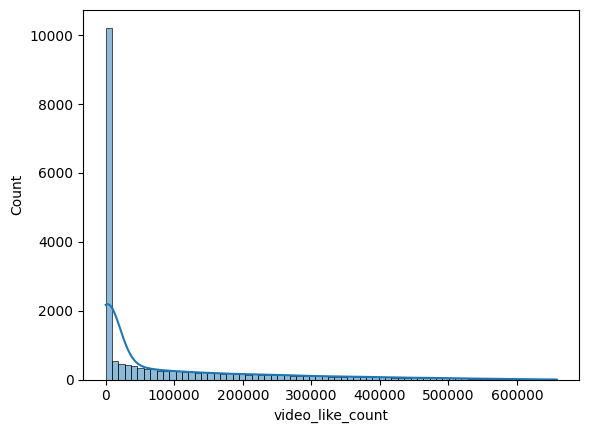

In [15]:
sns.histplot(df['video_like_count'],kde=True)

<Axes: xlabel='video_share_count', ylabel='Count'>

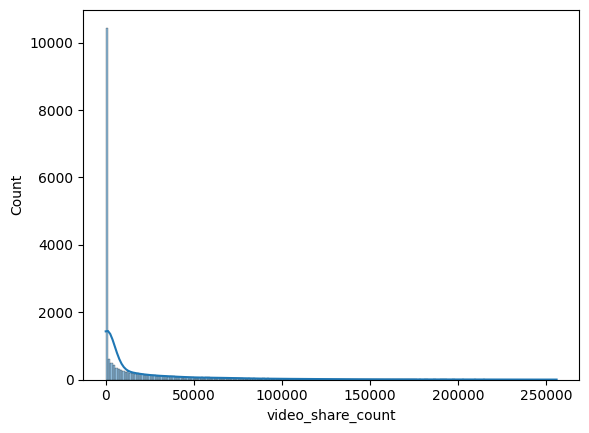

In [16]:
sns.histplot(df['video_share_count'],kde=True)

<Axes: xlabel='video_download_count', ylabel='Count'>

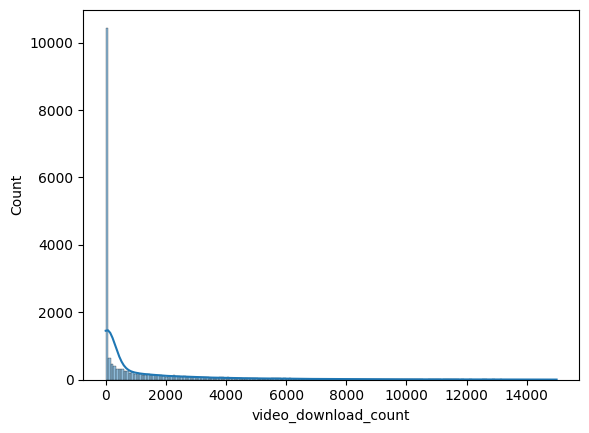

In [17]:
sns.histplot(df['video_download_count'],kde=True)

<Axes: xlabel='video_comment_count', ylabel='Count'>

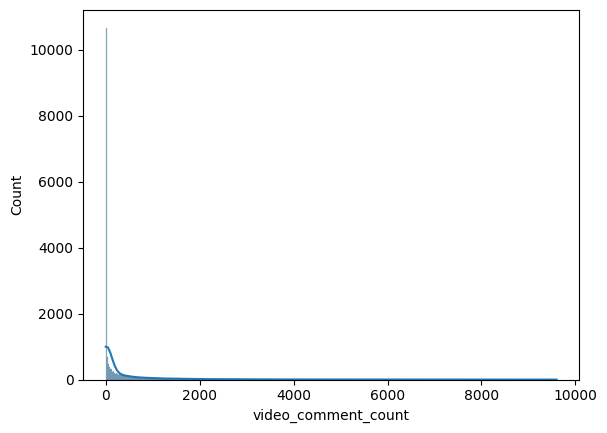

In [18]:
sns.histplot(df['video_comment_count'],kde=True)

In [19]:
def capping_outliers(column):
    q1=df['video_like_count'].quantile(0.25)
    q3=df['video_like_count'].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    if column > upper:
        return upper
    elif column < lower:
        return lower
    else:
        return column

In [20]:
df['video_like_count']=df['video_like_count'].apply(capping_outliers)

<Axes: xlabel='video_like_count'>

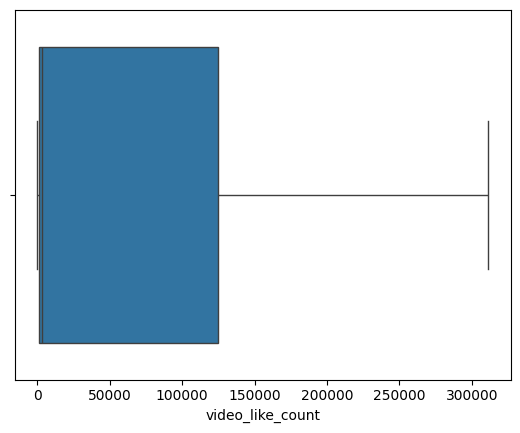

In [21]:
sns.boxplot(x=df['video_like_count'])

In [22]:
def capping_outliers(column):
    q1=df['video_share_count'].quantile(0.25)
    q3=df['video_share_count'].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    if column > upper:
        return upper
    elif column < lower:
        return lower
    else:
        return column

In [23]:
df['video_share_count']=df['video_share_count'].apply(capping_outliers)

<Axes: xlabel='video_share_count'>

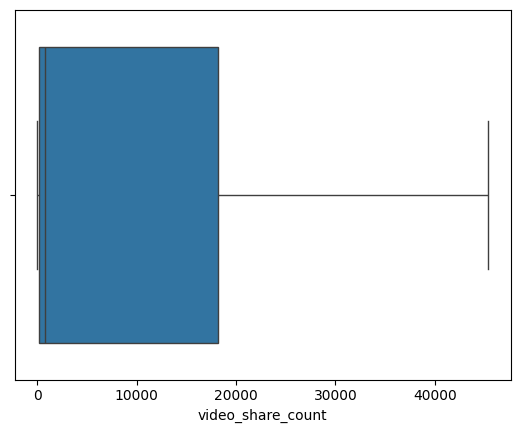

In [24]:
sns.boxplot(x=df['video_share_count'])

In [25]:
def capping_outliers(column):
    q1=df['video_comment_count'].quantile(0.25)
    q3=df['video_comment_count'].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    if column > upper:
        return upper
    elif column < lower:
        return lower
    else:
        return column

In [26]:
df['video_comment_count']=df['video_comment_count'].apply(capping_outliers)

<Axes: xlabel='video_comment_count'>

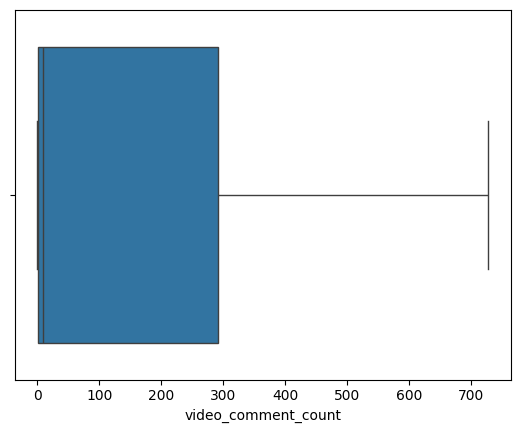

In [27]:
sns.boxplot(x=df['video_comment_count'])

In [28]:
def capping_outliers(column):
    q1=df['video_download_count'].quantile(0.25)
    q3=df['video_download_count'].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    if column > upper:
        return upper
    elif column < lower:
        return lower
    else:
        return column

In [29]:
df['video_download_count']=df['video_download_count'].apply(capping_outliers)

<Axes: xlabel='video_download_count'>

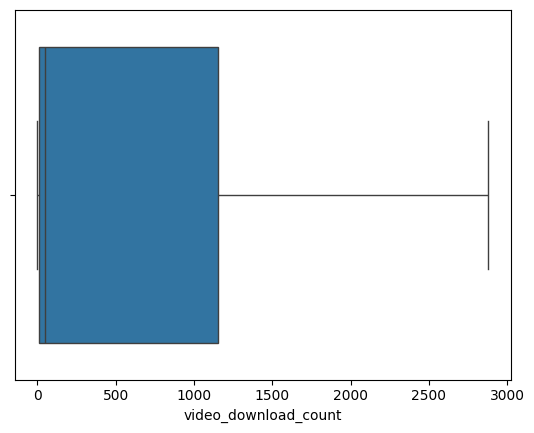

In [30]:
sns.boxplot(x=df['video_download_count'])

In [31]:
df.to_csv("cleaned_tiktok_Data.csv")

In [32]:
df=pd.read_csv("cleaned_tiktok_Data.csv")

In [33]:
df.head()

,Unnamed: 0,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


## **Step 2. Data Exploration (Continue EDA)**



### **Data visualizations**

In [34]:
df.columns

Index(['Unnamed: 0', '#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

<Axes: xlabel='claim_status', ylabel='video_duration_sec'>

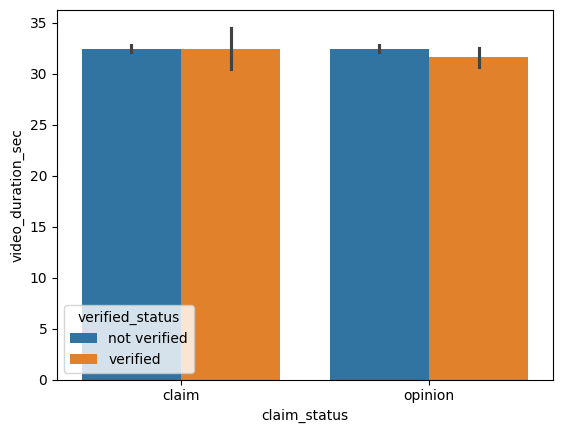

In [35]:
sns.barplot(x=df['claim_status'],y=df['video_duration_sec'],hue=df['verified_status'])

<Axes: xlabel='claim_status', ylabel='video_view_count'>

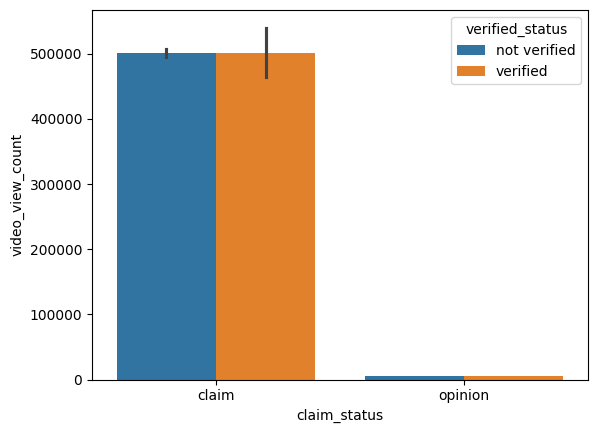

In [36]:
sns.barplot(x=df['claim_status'],y=df['video_view_count'],hue=df['verified_status'])

<Axes: xlabel='claim_status', ylabel='video_view_count'>

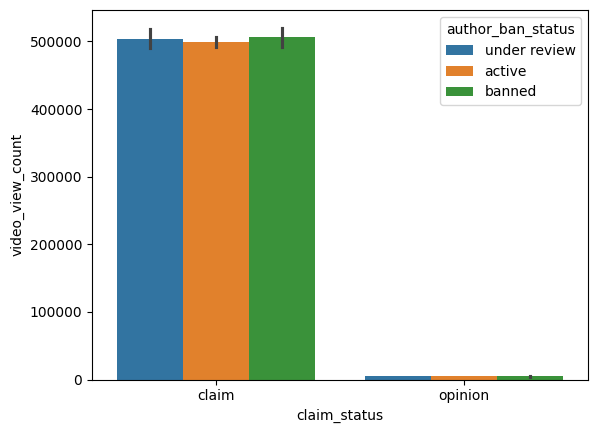

In [37]:
sns.barplot(x=df['claim_status'],y=df['video_view_count'],hue=df['author_ban_status'])

<Axes: xlabel='claim_status', ylabel='video_share_count'>

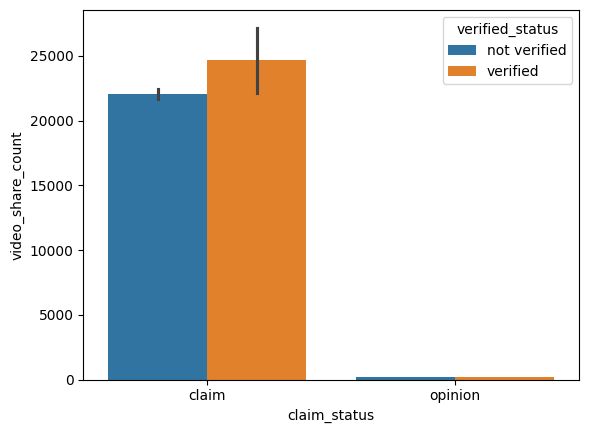

In [38]:
sns.barplot(x=df['claim_status'],y=df['video_share_count'],hue=df['verified_status'])

<Axes: xlabel='claim_status', ylabel='video_share_count'>

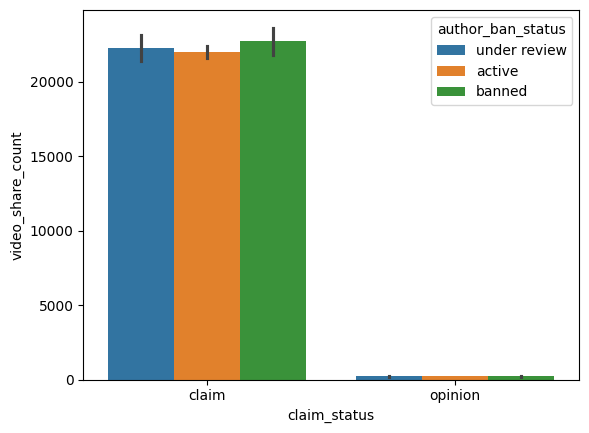

In [39]:
sns.barplot(x=df['claim_status'],y=df['video_share_count'],hue=df['author_ban_status'])

<Axes: xlabel='claim_status', ylabel='video_download_count'>

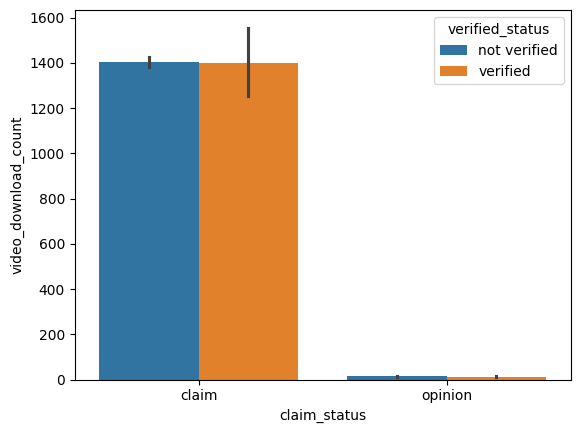

In [40]:
sns.barplot(x=df['claim_status'],y=df['video_download_count'],hue=df['verified_status'])

<Axes: xlabel='claim_status', ylabel='video_download_count'>

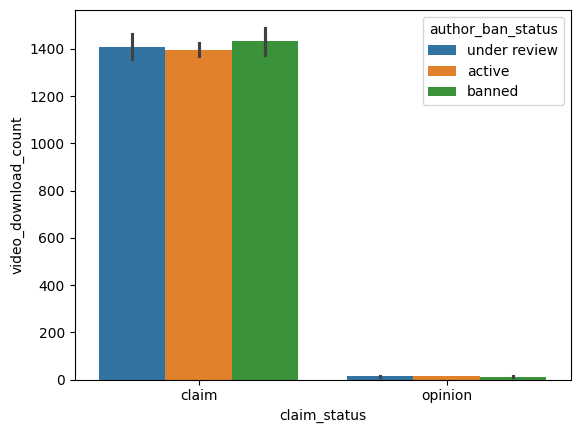

In [41]:
sns.barplot(x=df['claim_status'],y=df['video_download_count'],hue=df['author_ban_status'])

<Axes: xlabel='claim_status', ylabel='video_comment_count'>

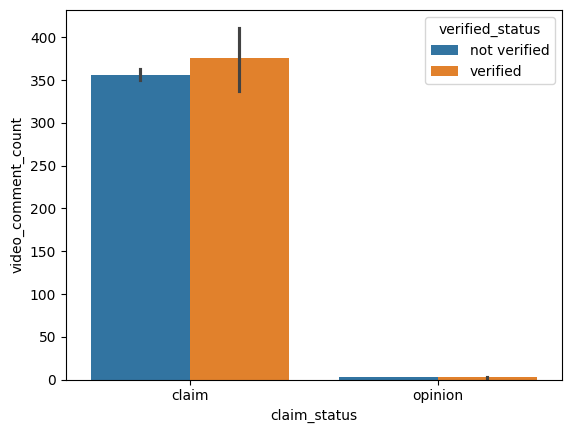

In [42]:
sns.barplot(x=df['claim_status'],y=df['video_comment_count'],hue=df['verified_status'])

<Axes: xlabel='claim_status', ylabel='video_comment_count'>

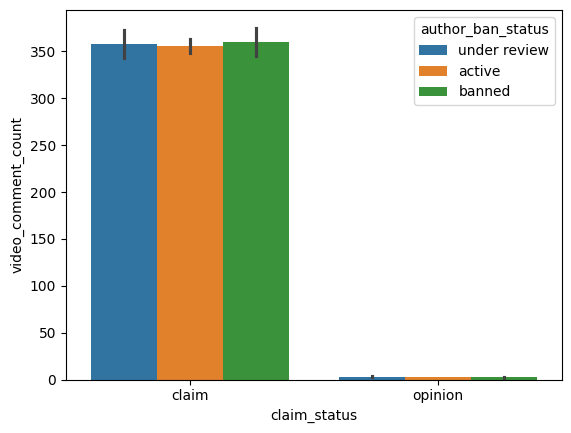

In [43]:
sns.barplot(x=df['claim_status'],y=df['video_comment_count'],hue=df['author_ban_status'])

In [44]:
df.drop('Unnamed: 0', axis=1,inplace=True)
df.drop('#', axis=1,inplace=True)

In [45]:
df.columns

Index(['claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [47]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Exclude 'video_transcription_text' from categorical columns
categorical_columns = [col for col in categorical_columns if col != 'video_transcription_text']



Value counts for verified_status grouped by claim_status:
 verified_status  not verified  verified
claim_status                           
claim                    9399       209
opinion                  8485       991 



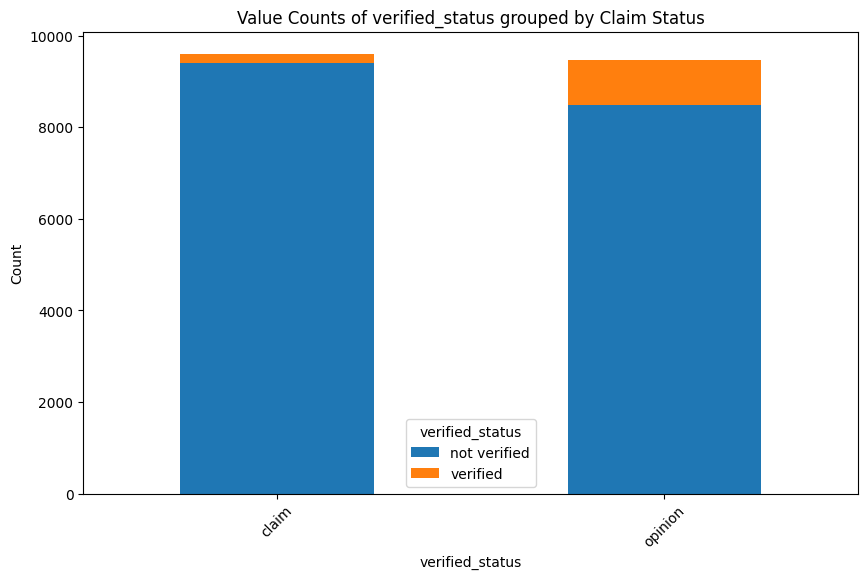

Value counts for author_ban_status grouped by claim_status:
 author_ban_status  active  banned  under review
claim_status                                   
claim                6566    1439          1603
opinion              8817     196           463 



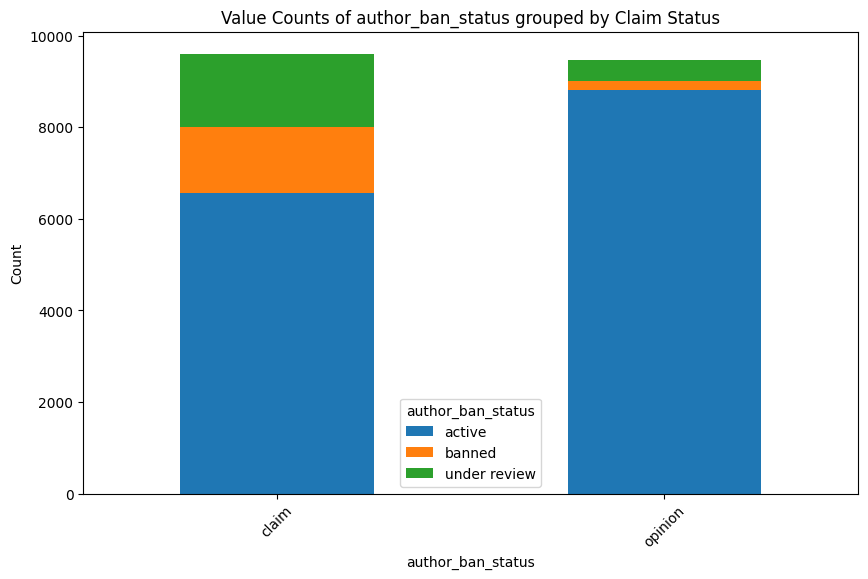

In [48]:
# Function to plot value counts grouped by claim status
def plot_value_counts_by_claim_status(df, column):
    grouped_counts = df.groupby('claim_status')[column].value_counts().unstack().fillna(0)
    print(f"Value counts for {column} grouped by claim_status:\n", grouped_counts, "\n")
    grouped_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Value Counts of {column} grouped by Claim Status')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.show()

# Generate value counts and count plots for categorical columns
for column in categorical_columns:
    if column != 'claim_status':
        plot_value_counts_by_claim_status(df, column)



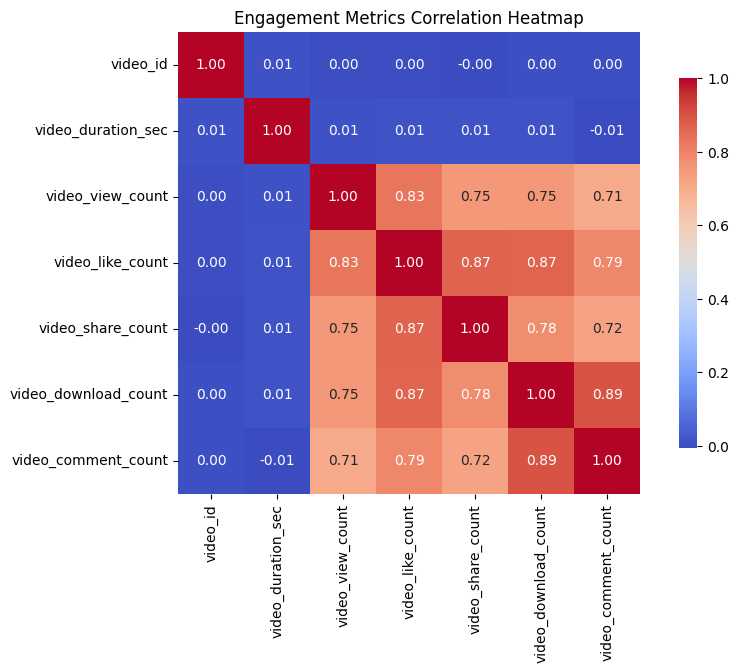

In [54]:
correlation_matrix=df[numerical_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Engagement Metrics Correlation Heatmap')
plt.show()

### **Insights**
- video view count,video share count,video download count and video comment count of claims is much higher than opinions
- claims and opinions of non verified users are much greater than verified users



## **Statistical and Hypothesis Test**
**for Self Learning**

In [55]:
from scipy import stats

In [56]:
# Compute the mean `video_view_count` for each group in `verified_status`
df.groupby("verified_status")["video_view_count"].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

*   **Null hypothesis**: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).
*    **Alternative hypothesis**: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

**$H_0$**: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).

**$H_A$**: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

In [58]:
# Save each sample in a variable
not_verified = df[df["verified_status"] == "not verified"]["video_view_count"]
verified = df[df["verified_status"] == "verified"]["video_view_count"]

# Implement a t-test using the two samples
stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

TtestResult(statistic=np.float64(25.499441780633777), pvalue=np.float64(2.6088823687177823e-120), df=np.float64(1571.163074387424))

Since the p-value is extremely small (much smaller than the significance level of 5%), you reject the null hypothesis. we conclude that there **is** a statistically significant difference in the mean video view count between verified and unverified accounts on TikTok.

## **Step 3. Model Building, Step 4. Results and Evaluation**
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### **encoding non numeric variables**
- verified status and author ban status is a categorical variable which means you can dummy it for modeling.
- claim status is categorical too but its outcome variable so it's better not to dummy this column, but rather to convert the levels to numbers.

In [60]:
df.head()


,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [84]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Copy df1 to df_enc
df_enc = df.copy()

# Nominal columns to one-hot encode
nominal_cols = ['verified_status','author_ban_status']

# Ordinal columns to label encode
ordinal_cols = {
    'claim_status':['claim','opinion']
}

# Apply one-hot encoding to nominal variables
df_enc = pd.get_dummies(df_enc, columns=nominal_cols)

# Apply label encoding to ordinal variables
label_encoders = {}
for col, categories in ordinal_cols.items():
    le = LabelEncoder()
    le.fit(categories)
    df_enc[col] = le.transform(df_enc[col])
    label_encoders[col] = le

In [85]:
df_enc.head()


,claim_status,video_id,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
0,0,7017666017,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,True,False,False,False,True
1,0,4014381136,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,True,False,True,False,False
2,0,9859838091,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,True,False,True,False,False
3,0,1866847991,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,True,False,True,False,False
4,0,7105231098,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,True,False,True,False,False


In [86]:
#scaling numerical features
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# List of numerical columns to scale
numerical_cols = ['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count','video_download_count','video_comment_count']

# Fit and transform the numerical features
df_enc[numerical_cols] = scaler.fit_transform(df_enc[numerical_cols])
df_enc.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
0,0,7017666017,1.637872,someone shared with me that drone deliveries a...,0.274362,-0.512588,-0.664083,-0.678613,-0.665338,True,False,False,False,True
1,0,4014381136,-0.026119,someone shared with me that there are more mic...,-0.352545,0.028305,0.469863,0.426302,1.848651,True,False,True,False,False
2,0,9859838091,-0.087748,someone shared with me that american industria...,2.005286,0.218173,-0.506176,0.113878,0.543876,True,False,True,False,False
3,0,1866847991,-0.457524,someone shared with me that the metro of st. p...,0.566138,1.546492,1.421888,0.495836,1.481108,True,False,True,False,False
4,0,7105231098,-0.827300,someone shared with me that the number of busi...,-0.614899,-0.367285,-0.430632,-0.158541,-0.106674,True,False,True,False,False


### **Modeling Approach A: Logistic Regression Model**


### **Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables 
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size 

In [87]:
df["claim_status"].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

In [88]:
df_logreg = df_enc.copy()

# Display first few rows of new dataframe
df_logreg.head()


,claim_status,video_id,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
0,0,7017666017,1.637872,someone shared with me that drone deliveries a...,0.274362,-0.512588,-0.664083,-0.678613,-0.665338,True,False,False,False,True
1,0,4014381136,-0.026119,someone shared with me that there are more mic...,-0.352545,0.028305,0.469863,0.426302,1.848651,True,False,True,False,False
2,0,9859838091,-0.087748,someone shared with me that american industria...,2.005286,0.218173,-0.506176,0.113878,0.543876,True,False,True,False,False
3,0,1866847991,-0.457524,someone shared with me that the metro of st. p...,0.566138,1.546492,1.421888,0.495836,1.481108,True,False,True,False,False
4,0,7105231098,-0.827300,someone shared with me that the number of busi...,-0.614899,-0.367285,-0.430632,-0.158541,-0.106674,True,False,True,False,False


**checking severe multicollinearity among X variables**

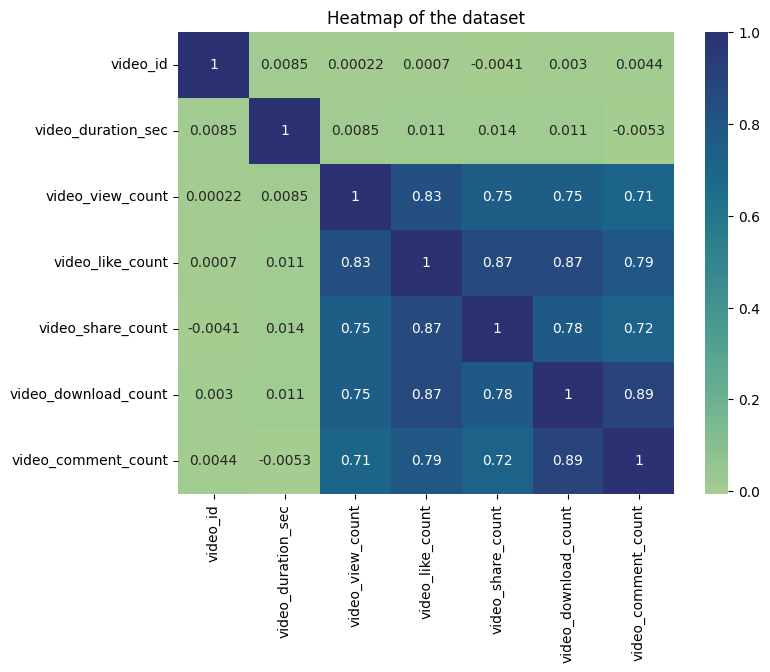

In [89]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True),
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

from the above heatmap it is better to remove video download count and video like count for severe multicollinearity assumption

In [90]:
# Isolate the outcome variable
y = df_logreg['claim_status']

# Display first few rows of the outcome variable
y.head() 

0    0
1    0
2    0
3    0
4    0
Name: claim_status, dtype: int64

In [91]:
# Select the features you want to use in your model
df_logreg.drop('video_id', axis=1,inplace=True)
df_logreg.drop('video_like_count', axis=1,inplace=True)
df_logreg.drop('video_download_count', axis=1,inplace=True)
df_logreg.drop('claim_status', axis=1,inplace=True)
X=df_logreg.copy()
# Display the first few rows of the selected features 
X.head()

,video_duration_sec,video_transcription_text,video_view_count,video_share_count,video_comment_count,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
0,1.637872,someone shared with me that drone deliveries a...,0.274362,-0.664083,-0.665338,True,False,False,False,True
1,-0.026119,someone shared with me that there are more mic...,-0.352545,0.469863,1.848651,True,False,True,False,False
2,-0.087748,someone shared with me that american industria...,2.005286,-0.506176,0.543876,True,False,True,False,False
3,-0.457524,someone shared with me that the metro of st. p...,0.566138,1.421888,1.481108,True,False,True,False,False
4,-0.827300,someone shared with me that the number of busi...,-0.614899,-0.430632,-0.106674,True,False,True,False,False


In [92]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### **BONUS CONTENT - Tokenize text column**


The feature `video_transcription_text` is text-based. It is not a categorical variable, since it does not have a fixed number of possible values. One way to extract numerical features from it is through a bag-of-words algorithm like [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

`CountVectorizer` works by splitting text into n-grams, which are groups of n consecutive words. For instance, "a dime for a cup of coffee" (phrase A) broken into 2-grams would result in six two-word combinations:

`a dime` | `dime for` |`for a`| `a cup` | `cup of` | `of coffee` |

Then, the next sample's text would be parsed into 2-grams. So, "ask for a cup for a child" (phrase B) would result in:

`ask for` |`for a`| `a cup` | `cup for` | `for a` | `a child` |

This process would repeat for each observation in the dataset, and each n-gram would be treated like a distinct feature. Then, the text of each observation is compared to the full array of n-grams, and the numbers of occurrences are tallied:

|  | `a dime` |`dime for`  |`for a`| `a cup` | `cup of` | `of coffee` | `ask for` | `cup for` | `a child` |
|--: |:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|phrase A |1|1|1|1|1|1|0|0|0|
|phrase B |0|0|2|1|1|0|1|1|1|
|**TOTAL**|1|1|3|2|2|1|1|1|1|

This would happen for the text of each observation in the data, and the text of each observation is parsed to get tallies for all the 2-word phrases from the entire data set for each observation, creating a large matrix.

If text is broken into 1-grams, then each feature in the matrix is an individual word.

After the count matrix has been created, `CountVectorizer` lets you the choose to keep only the most frequently occurring n-grams. You specify how many. The n-grams that you select can then be used as features in a model.

Splitting text into n-grams is an example of tokenization. Tokenization is the process of breaking text into smaller units to derive meaning from the resulting tokens.

This notebook breaks each video's transcription text into both 2-grams and 3-grams, then takes the 15 most frequently occurring tokens from the entire dataset to use as features.

In [93]:
# Set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In [94]:
# Extract numerical features from `video_transcription_text` in the training set
count_data = count_vec.fit_transform(X_train['video_transcription_text']).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [95]:
# Place the numerical representation of `video_transcription_text` from training set into a dataframe
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())

# Display first few rows
count_df.head()

,colleague discovered,colleague learned,colleague read,discussion board,friend learned,friend read,internet forum,learned media,learned news,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
# Concatenate `X_train` and `count_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `video_transcription_text`,
# so that the indices align with those in `X_train` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_comment_count,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review,colleague discovered,colleague learned,colleague read,discussion board,friend learned,friend read,internet forum,learned media,learned news,media claim,news claim,point view,read media,social media,willing wager
0,-1.135447,-0.448406,0.117726,0.385833,True,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.642412,1.505963,0.798106,2.012207,True,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.443593,0.881920,0.058775,0.646788,True,False,False,True,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-1.566852,-0.776743,-0.664203,-0.654311,True,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.073817,-0.765804,-0.663479,-0.665338,True,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train_final, y_train)

In [98]:
# Extract numerical features from `video_transcription_text` in the testing set
test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()

# Place the numerical representation of `video_transcription_text` from test set into a dataframe
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())

# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']
                                      ).reset_index(drop=True), test_count_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_comment_count,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review,colleague discovered,colleague learned,colleague read,discussion board,friend learned,friend read,internet forum,learned media,learned news,media claim,news claim,point view,read media,social media,willing wager
0,-0.704042,-0.771113,-0.673737,-0.654311,True,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.642412,1.100078,1.236889,1.547266,True,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.765671,1.357485,0.047854,2.012207,True,False,True,False,False,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,-0.457524,1.435427,2.059699,1.701634,True,False,True,False,False,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,1.699502,-0.768449,-0.656963,-0.635934,True,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test_final)

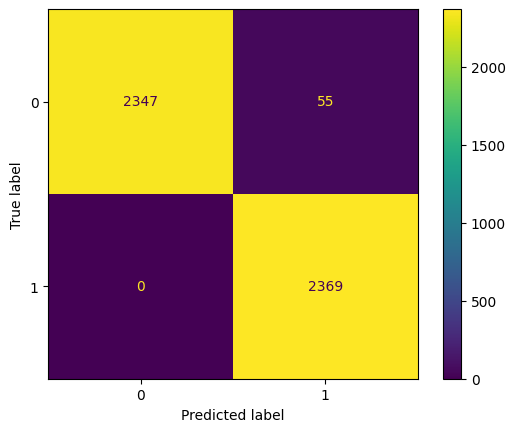

In [100]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Check the class balance in the data. In other words, check the value counts in the `claim_status` column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [102]:
df['claim_status'].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

There is an approximately 50%-50% split. So the data is  perfectly balanced. 

In [103]:
# Create classification report for logistic regression model
target_names = ['Predicted claim', 'Predicted opinion']
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

  Predicted claim       1.00      0.98      0.99      2402
Predicted opinion       0.98      1.00      0.99      2369

         accuracy                           0.99      4771
        macro avg       0.99      0.99      0.99      4771
     weighted avg       0.99      0.99      0.99      4771



The classification report above shows that the logistic regression model achieved a precision of 99%, recall of 99%, f1-score of 99% (all weighted averages), and accuracy of 99%. 

### **Modeling Approach B: Tree-based Model**


In [104]:
# Isolate the outcome variable
y = df_enc['claim_status']

# Display the first few rows of `y`
y.head()

0    0
1    0
2    0
3    0
4    0
Name: claim_status, dtype: int64

In [106]:
df_tree1 = df_enc.copy()
# Select the features you want to use in your model
df_tree1.drop('claim_status', axis=1,inplace=True)
df_tree1.drop('video_id', axis=1,inplace=True)
X=df_tree1.copy()
# Display the first few rows of the selected features 
X.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
0,1.637872,someone shared with me that drone deliveries a...,0.274362,-0.512588,-0.664083,-0.678613,-0.665338,True,False,False,False,True
1,-0.026119,someone shared with me that there are more mic...,-0.352545,0.028305,0.469863,0.426302,1.848651,True,False,True,False,False
2,-0.087748,someone shared with me that american industria...,2.005286,0.218173,-0.506176,0.113878,0.543876,True,False,True,False,False
3,-0.457524,someone shared with me that the metro of st. p...,0.566138,1.546492,1.421888,0.495836,1.481108,True,False,True,False,False
4,-0.827300,someone shared with me that the number of busi...,-0.614899,-0.367285,-0.430632,-0.158541,-0.106674,True,False,True,False,False


In [107]:
# Split the data into training and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [108]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

In [109]:
# Get shape of each training, validation, and testing set
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((11450, 12), (3817, 12), (3817, 12), (11450,), (3817,), (3817,))

In [110]:
# Set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In [111]:
# Extract numerical features from `video_transcription_text` in the training set
count_data = count_vec.fit_transform(X_train['video_transcription_text']).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [112]:
# Place the numerical representation of `video_transcription_text` from training set into a dataframe
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())

# Display first few rows
count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
# Concatenate `X_train` and `count_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `video_transcription_text`,
# so that the indices align with those in `X_train` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,1.144838,-0.781150,-0.691065,-0.677418,-0.678613,-0.665338,True,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.651803,-0.421812,-0.660878,-0.656058,-0.612890,-0.558750,True,False,False,True,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,-0.642412,-0.460866,-0.676359,-0.664807,-0.642418,-0.632259,True,False,False,False,True,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,-0.950559,-0.760220,-0.678366,-0.652075,-0.667183,-0.650636,True,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.888930,-0.777112,-0.687797,-0.674823,-0.670993,-0.661662,True,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
# Extract numerical features from `video_transcription_text` in the testing set
validation_count_data = count_vec.transform(X_val['video_transcription_text']).toarray()
validation_count_data

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [115]:
# Place the numerical representation of `video_transcription_text` from validation set into a dataframe
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())
validation_count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [116]:
# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_val after dropping `video_transcription_text`,
# so that the indices align with those in `validation_count_df`
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)

# Display first few rows
X_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,-1.320335,1.004019,2.212966,0.203045,2.063792,-0.503619,True,False,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.519154,-0.769480,-0.678002,-0.659859,-0.667183,-0.661662,True,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.158769,0.482053,1.637621,0.904363,1.282612,2.012207,True,False,True,False,False,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1.576243,0.471383,-0.451328,-0.604408,-0.142348,0.246167,True,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.898321,2.223283,0.596107,0.849153,2.063792,2.012207,True,False,False,False,True,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [117]:
# Extract numerical features from `video_transcription_text` in the testing set
test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()

# Place the numerical representation of `video_transcription_text` from test set into a dataframe
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())

# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']
                                      ).reset_index(drop=True), test_count_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,1.329726,1.354587,0.575462,0.322456,-0.087102,0.481394,True,False,True,False,False,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0.282027,-0.772859,-0.676611,-0.676452,-0.663373,-0.661662,False,True,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.405286,1.694853,2.212966,2.059699,2.063792,2.012207,True,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.713433,-0.768942,-0.672353,-0.627518,-0.663373,-0.646961,True,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.395895,0.932442,0.303821,0.247455,-0.439532,-0.330874,True,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### **Decision tree**

In [118]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='recall')

In [119]:
%%time
tree1.fit(X_train_final, y_train)

CPU times: total: 12.1 s
Wall time: 12.1 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [120]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [121]:
# Check best Recall score on CV
print(tree1.best_score_)

0.9998231966053748


This high recall score suggests that the model is extremely effective at minimizing false negatives, which means it rarely misses positive cases.

In [122]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [123]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'recall')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.992461,0.999823,0.996127,0.996157,0.996288


Overall, these results suggest that decision tree model is performing exceptionally well

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions.  construct a random forest model next.

#### **Random forest**

In [141]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [142]:
%%time
rf_cv.fit(X_train_final, y_train)

CPU times: total: 12min 37s
Wall time: 13min 6s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [143]:
# Define a path to the folder where you want to save the model
path = 'C:/Users/Probook/Desktop/ML Model for Tiktok/'

In [144]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [145]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [146]:
# Write pickle
write_pickle(path, rf_cv, 'rf1_tiktok')

In [147]:
# Read pickle
rf_cv = read_pickle(path, 'rf1_tiktok')

In [148]:
# Check best recall score on CV
print(rf_cv.best_score_)

0.9998231653404067


In [149]:
# Check best params
print(rf_cv.best_params_)

{'max_depth': 5, 'max_features': 0.3, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [150]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf_cv, 'recall')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.992461  0.999823  0.996127  0.996157  0.996288
              model  precision    recall        F1  accuracy      auc
0  random forest cv   0.991242  0.999823  0.995512  0.995546  0.99892


Both models perform well, but the Decision Tree has a slight edge in precision, F1 score, and accuracy. However, the Random Forest excels in AUC, suggesting it may be more robust in differentiating classes.Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. 

In [156]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [157]:
%%time
xgb_cv.fit(X_train_final, y_train)

CPU times: total: 15min 26s
Wall time: 2min 8s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [158]:
# Define a path to the folder where you want to save the model
path = 'C:/Users/Probook/Desktop/ML Model for Tiktok/'

In [159]:
# Write pickle
write_pickle(path, xgb_cv, 'xgb_tiktok')

In [161]:
# Read pickle
xgb_cv = read_pickle(path, 'xgb_tiktok')

In [162]:
xgb_cv.best_score_

np.float64(1.0)

In [163]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 300}

In [164]:
# Get all CV scores
xgb_cv_results = make_results('xgb cv', xgb_cv, 'recall')
print(tree1_cv_results)
print(rf1_cv_results)
print(xgb_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.992461  0.999823  0.996127  0.996157  0.996288
              model  precision    recall        F1  accuracy      auc
0  random forest cv   0.991242  0.999823  0.995512  0.995546  0.99892
    model  precision  recall        F1  accuracy       auc
0  xgb cv   0.987786     1.0  0.993853  0.993886  0.996695


The Decision Tree shows the highest precision (0.9925) and F1 score (0.9961), while the Random Forest excels in AUC (0.9989), indicating better overall class separation. The XGBoost model has the perfect recall (1.0), but slightly lower precision (0.9878) and F1 score (0.9939)

## **Evaluate models**

Evaluate models against validation data.


In [165]:
# Use the random forest "best estimator" model to get predictions on the validation set
y_pred = rf_cv.best_estimator_.predict(X_val_final)

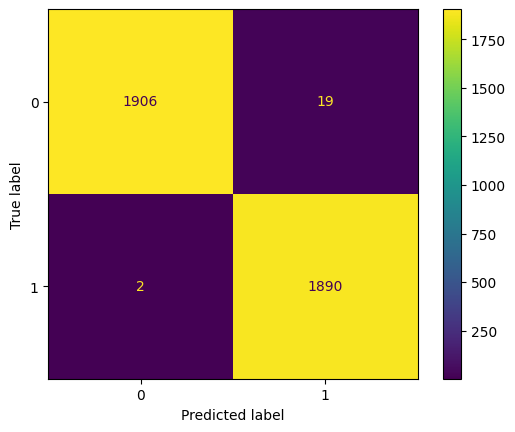

In [166]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [167]:
# Create a classification report
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      0.99      0.99      1925
       claim       0.99      1.00      0.99      1892

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



Now, evaluate the XGBoost model on the validation set.

In [168]:
#Evaluate XGBoost model
y_pred = xgb_cv.best_estimator_.predict(X_val_final)

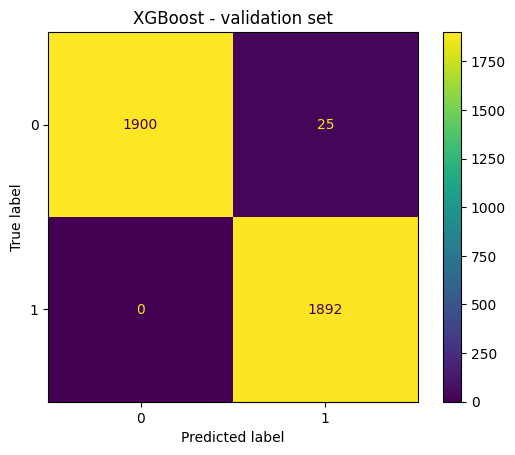

In [169]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('XGBoost - validation set');
plt.show()


In [170]:
# Create a classification report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      0.99      0.99      1925
       claim       0.99      1.00      0.99      1892

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



### **Use champion model to predict on test data**

Both random forest and XGBoost model have same recall score

In [171]:
# Use champion model to predict on test data
y_pred = rf_cv.best_estimator_.predict(X_test_final)

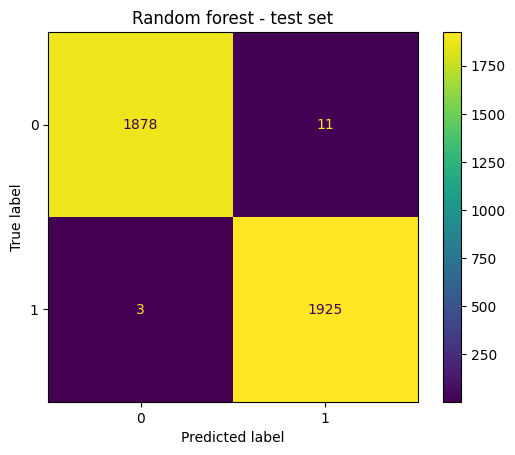

In [172]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('Random forest - test set');
plt.show()

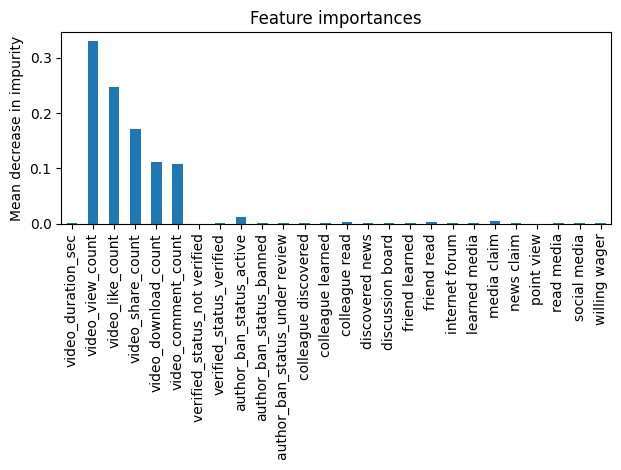

In [173]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test_final.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

The plot above shows that in this random forest model `video view count`, `video like count`, `video share count`, `video download count`, and `video comment count` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `claim status`.

## **Step 4. Results and Evaluation**
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### **Summary of model results**

**Logistic Regression**

The logistic regression model achieved precision of 99%, recall of 99%, f1-score of 99% (all weighted averages), and accuracy of 99%, on the test set.

**Tree-based Machine Learning and XGBOOST**

These models performed well on both the validation and test holdout data. Furthermore, both precision and F1 scores were consistently high. The model very successfully classified claims and opinions.

### **Conclusion**

The model's most predictive features were all related to the user engagement levels associated with each video. It was classifying videos based on how many views, likes, shares, and downloads they received.
Because the model currently performs nearly perfectly, there is no need to engineer any new features.
